In [34]:
import pandas as pd

In [35]:
Tanks = pd.read_csv(r'file_path')
Tanks.head()

,Size (Litres),Brand,Price (Kshs)
0,500,Kentank,4800
1,500,Jumbo tank,6000
2,500,Vectus tank,4000
3,500,Toptank,5200
4,500,Techno tank,4900


In [36]:
Tanks.shape

(109, 3)

In [37]:
#Data Quality Check

In [38]:
#missing values
missing = Tanks.isnull().sum()
missing

Size (Litres)    0
Brand            0
Price (Kshs)     0
dtype: int64

In [39]:
#duplicates
duplicates = Tanks.duplicated().sum()
duplicates

0

In [40]:
#validate data types
Tanks.dtypes

Size (Litres)     int64
Brand            object
Price (Kshs)      int64
dtype: object

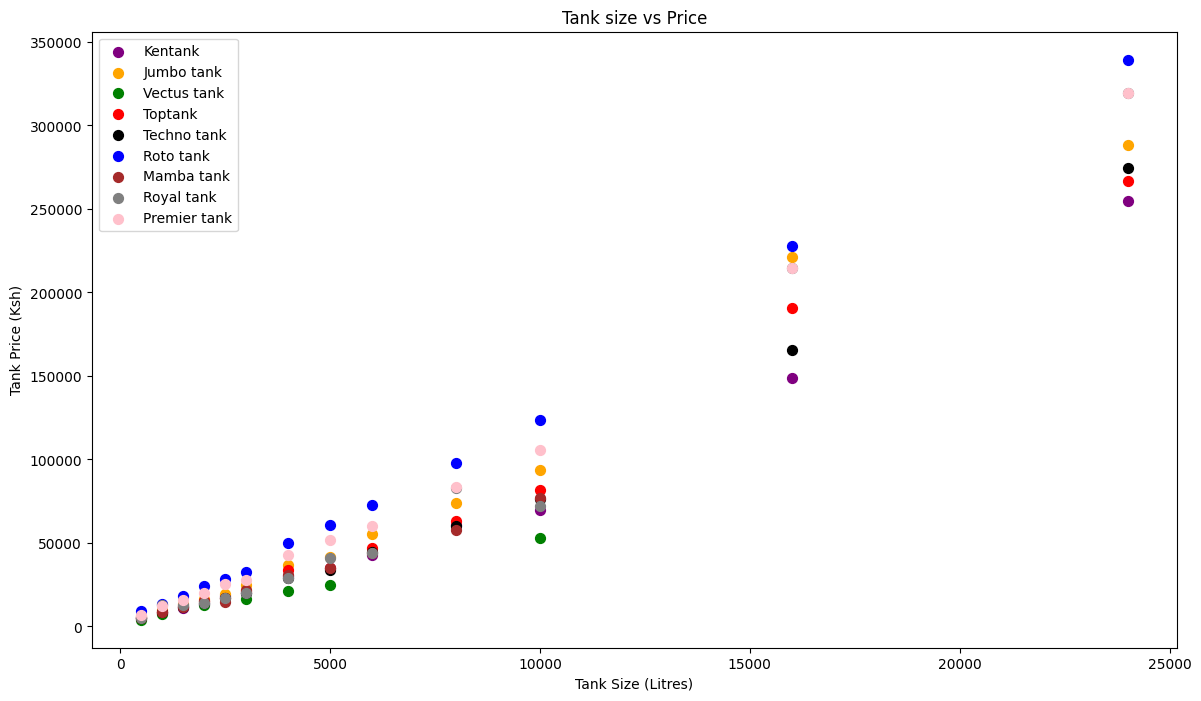

In [59]:
#logical consistency
import matplotlib.pyplot as plt
colors = {'Roto tank': 'blue',  
    'Jumbo tank': 'orange', 
    'Vectus tank': 'green',  
    'Toptank': 'red', 
    'Kentank': 'purple',  
    'Mamba tank': 'brown', 
    'Premier tank': 'pink', 
    'Royal tank': 'gray', 
    'Techno tank': 'black', 
         }
plt.figure(figsize=(14,8))

for brand in Tanks['Brand'].unique():
    plt.scatter(Tanks[Tanks['Brand'] == brand]['Size (Litres)'],Tanks[Tanks['Brand'] == brand]['Price (Kshs)'],
                color=colors[brand],label=brand,s=50)
#plt.scatter(Tanks['Size (Litres)'],Tanks['Price (Kshs)'])

plt.xlabel('Tank Size (Litres)')
plt.ylabel('Tank Price (Ksh)')
plt.title('Tank size vs Price')
plt.legend()
plt.show()

In [42]:
#Analysis

In [43]:
#price range of each brand?
price_range_by_brand = Tanks.groupby('Brand')['Price (Kshs)'].agg(['min','max'])
price_range_by_brand

,min,max
Brand,,
Jumbo tank,6000,288500
Kentank,4800,254500
Mamba tank,5450,77000
Premier tank,7000,319500
Roto tank,9280,339350
Royal tank,5200,319500
Techno tank,4900,274700
Toptank,5200,266900
Vectus tank,4000,52999


In [44]:
#Does tank size affect price?
correlation  = Tanks['Size (Litres)'].corr(Tanks['Price (Kshs)'])
print(f'The correlation between size and price is {correlation}')

The correlation between size and price is 0.9738994820917819


In [45]:
#which brand offers cheapest tanks for given size?
def cheapest_brand_for_size(size):
    filtered_Tanks = Tanks[Tanks['Size (Litres)'] == size]
    cheapest_tank = filtered_Tanks.loc[filtered_Tanks['Price (Kshs)'].idxmin()]
    return cheapest_tank['Brand'], cheapest_tank['Price (Kshs)']

brand,price = cheapest_brand_for_size(24000) #input different sizes of tanks to get the cheapest.
print(f'The cheapest brand is {brand} with a price of Kshs {price} ')

The cheapest brand is Kentank with a price of Kshs 254500 


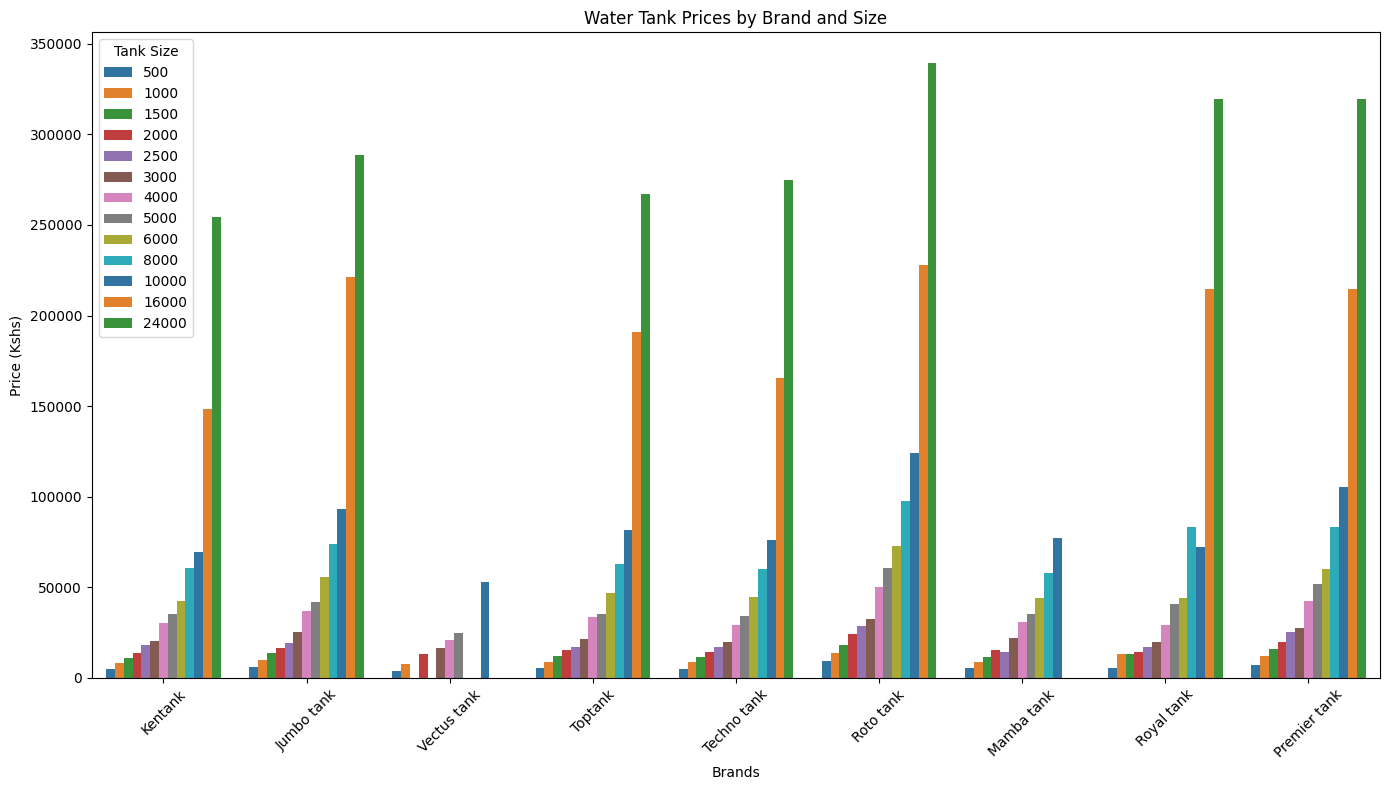

In [46]:
#Distribution of tank prices by brands and sizes
#plotting the clustered column chart
import seaborn as sns
#define a color palette for the diff sizes
palette = {
    500: '#1f77b4',   # Blue
    1000: '#ff7f0e',  # Orange
    1500: '#2ca02c',  # Green
    2000: '#d62728',  # Red
    2500: '#9467bd',  # Purple
    3000: '#8c564b',  # Brown
    4000: '#e377c2',  # Pink
    5000: '#7f7f7f',  # Gray
    6000: '#bcbd22',  # Olive
    8000: '#17becf',  # Cyan
    10000: '#1f77b4', # Light Blue
    16000: '#ff7f0e', # Light Orange
    24000: '#2ca02c'  # Light Green
}
plt.figure(figsize = (14,8))
sns.barplot(x='Brand', y='Price (Kshs)', hue='Size (Litres)', data=Tanks,palette=palette, errorbar=None)

#adding labels and title
plt.xlabel('Brands')
plt.ylabel('Price (Kshs)')
plt.title('Water Tank Prices by Brand and Size')
plt.legend(title = 'Tank Size')

#Rotating x axis labels for better readability
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [47]:
#is there a significant difference in prices btwn brands? Perform an ANOVA test
from scipy import stats
brand_prices = [Tanks[Tanks['Brand'] == brand]['Price (Kshs)'] for brand in Tanks['Brand'].unique()]
anova_result = stats.f_oneway(*brand_prices)
anova_result

F_onewayResult(statistic=0.693816304871136, pvalue=0.696163967559249)

In [48]:
#Since the p-value(0.696) is greater than 0.05, we fail to reject the null hypothesis. This means there is no enough 
#evidence to suggest that there are signifidant differences in prics btwn brands of water tanks.

In [49]:
#average price of water tanks by brand?
average_price_by_brand = Tanks.groupby('Brand')['Price (Kshs)'].mean()
average_price_by_brand

Brand
Jumbo tank      69345.615385
Kentank         55115.384615
Mamba tank      29336.363636
Premier tank    75752.307692
Roto tank       84505.000000
Royal tank      68092.307692
Techno tank     58469.230769
Toptank         61334.615385
Vectus tank     19997.714286
Name: Price (Kshs), dtype: float64

In [50]:
#most and least expensive brands on avg?
sorted_avg_price_by_brand = average_price_by_brand.sort_values(ascending = False)
most_expensive_brand = sorted_avg_price_by_brand.index[0]
least_expensive_brand = sorted_avg_price_by_brand.index[-1]
print(f'Most expensive brand on average is {most_expensive_brand}.')
print(f'Least expensive brand on average is {least_expensive_brand}.')

Most expensive brand on average is Roto tank.
Least expensive brand on average is Vectus tank.


In [51]:
#which brand offers best value for money based on price per litre?
Tanks['Price per Litre'] = Tanks['Price (Kshs)'] / Tanks['Size (Litres)']
best_value_brand = Tanks.groupby('Brand')['Price per Litre'].mean().idxmin()
print(f'Brand offering the best value for money is {best_value_brand}.')

Brand offering the best value for money is Vectus tank.
